In [99]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [87]:
df= pd.read_csv(r"smoking.csv")

In [88]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [89]:
df.info(max_cols=29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

Hre we can see that we are not able to see all the data types then we fill filter all the data type individualy so that we can perform one hot encoding

In [90]:
print(df.columns)

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')


In [91]:
lst=[]
for i in (df.columns):
    if df[i].dtypes=='object':
        lst.append(i)
lst

['gender', 'oral', 'tartar']

we wil also see the int  and float  columns 

In [92]:
lst1=[]

for i in range (len(df.columns)):
    if df[df.columns[i]].dtypes=="int64":
        lst1.append(df.columns[i])
lst1

['ID', 'age', 'height(cm)', 'weight(kg)', 'dental caries', 'smoking']

In [93]:
# now we will find the float values 

lst2=[]
i=len(df.columns)-1
while i>=0:
    column_name=df.columns[i]   # first we will find out the column name because i type simply df[i] it will not work and through error 
    if df[column_name].dtypes =='float64':
        lst2.append(column_name)
    i-=1

# for prining all the item of list as a new line character
for item in lst2:
    print('\n'+item )



Gtp

ALT

AST

serum creatinine

Urine protein

hemoglobin

LDL

HDL

triglyceride

Cholesterol

fasting blood sugar

relaxation

systolic

hearing(right)

hearing(left)

eyesight(right)

eyesight(left)

waist(cm)


no we can say we have only 3 column with object now we wil do the label encoding of that items

In [94]:
from sklearn.preprocessing import LabelEncoder

for i in df.columns :
    if df[i].dtypes=="object":
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])
        

now we can see in this code that we dont have any other column left in the our Data frame which has data type object 

In [95]:
lst5=[]
for i in range (len(df.columns)):
    c_name= df.columns[i]
    if df[c_name].dtypes== "bojcet":
        lst5.append[c_name]
len(lst5)

0

#  data visualization 

1 AS we can see their is gender column now we want to know who is smoking more 

AS we know for counting we use count plot and bar plot 

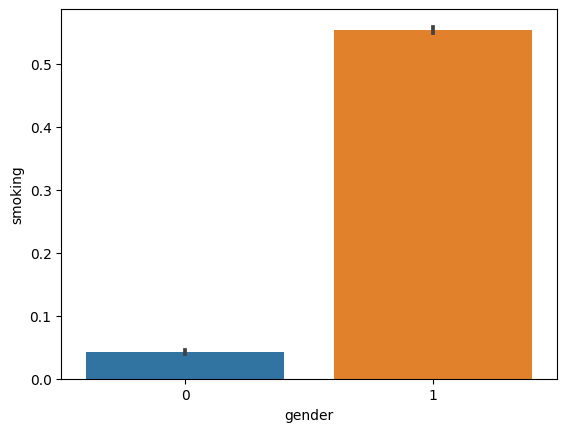

In [102]:
sns.barplot(x=df['gender'], y=df['smoking'])
plt.show()

we will count number of values in the tabels each and individual has 

In [103]:
lst6=[]
for i in (df.columns):
    count=df[i].value_counts
    lst6.append(count)
print(lst6)

[<bound method IndexOpsMixin.value_counts of 0            0
1            1
2            2
3            3
4            4
         ...  
55687    55676
55688    55681
55689    55683
55690    55684
55691    55691
Name: ID, Length: 55692, dtype: int64>, <bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        1
4        0
        ..
55687    0
55688    0
55689    0
55690    1
55691    1
Name: gender, Length: 55692, dtype: int32>, <bound method IndexOpsMixin.value_counts of 0        40
1        40
2        55
3        40
4        40
         ..
55687    40
55688    45
55689    55
55690    60
55691    55
Name: age, Length: 55692, dtype: int64>, <bound method IndexOpsMixin.value_counts of 0        155
1        160
2        170
3        165
4        155
        ... 
55687    170
55688    160
55689    160
55690    165
55691    160
Name: height(cm), Length: 55692, dtype: int64>, <bound method IndexOpsMixin.value_counts of 0        60
1        60
2        60
3        

Here we can see we are not able to see all the value counts that why we will try to use pi chart to show the value count in percentage 

<function matplotlib.pyplot.show(close=None, block=None)>

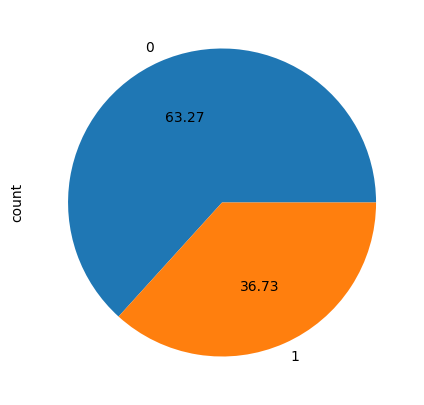

In [107]:
# first we chose the size of the figure 

plt.figure(figsize=(10,5))
df['smoking'].value_counts().plot.pie(autopct="%0.2f")
plt.show

# by watching this graph we can say there are 36.73 percentage of people who smokes other then that there more non smoker person 

Now we are going to plot the graph between cholestrol and smoking habbit so that we can say how many smoker have high cholestrol 

In [161]:
lst9=[]
for i in df.Cholesterol:

    if (i>=0 and i<120) :
        out_put="Low"

    elif i >=120 and i<160:
        out_put="Normal"

    else :
        out_put="greater"
    lst9.append(out_put)

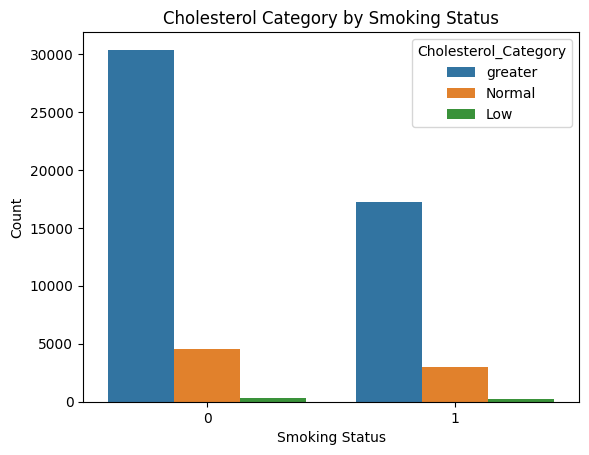

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'lst9' containing cholesterol categories as we made above 

# Add the 'Cholesterol_Category' column to your DataFrame

df['Cholesterol_Category'] = lst9

# Create a bar plot
sns.countplot(x='smoking', hue='Cholesterol_Category', data=df)

# Set labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Cholesterol Category by Smoking Status')

# Show the plot
plt.show()


number of smoker having age 40


In [151]:
df2=df[(df["smoking"]==1)& (df["age"]==40)] 
len(df2)

5593

In [152]:
df2.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,Cholesterol_Category
6,6,1,40,160,60,85.5,1.0,1.0,1.0,1.0,...,1.0,0.7,21.0,27.0,39.0,0,1,1,1,greater
21,26,1,40,180,85,82.0,1.5,1.5,1.0,1.0,...,1.0,0.8,42.0,65.0,37.0,0,0,0,1,greater
33,40,1,40,170,70,86.0,0.3,0.7,1.0,1.0,...,1.0,0.9,25.0,17.0,101.0,0,0,1,1,greater
35,42,1,40,170,80,89.0,1.5,1.5,1.0,1.0,...,1.0,1.3,27.0,19.0,22.0,0,0,1,1,greater
43,53,1,40,185,75,76.0,1.2,1.5,1.0,1.0,...,1.0,1.0,19.0,17.0,11.0,0,1,1,1,greater


now visualization of all the smoker with respect to their age 

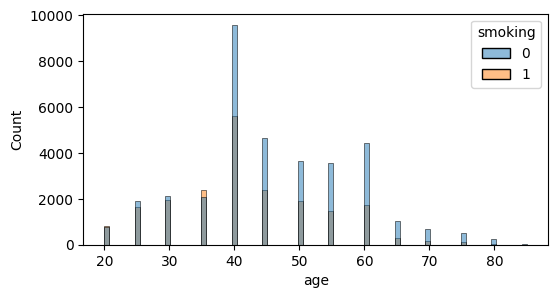

In [160]:
plt.figure(figsize=[6,3])
sns.histplot(x=df['age'],hue= df['smoking'])
plt.show()